In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.metrics import roc_curve,auc
from scipy import interp
from itertools import cycle
from sklearn.cluster import KMeans

In [2]:
df=pd.read_csv('Fuzzy_Traffic_Data.csv')

In [3]:
df

,Unnamed: 0,0,1
0,0,494.682599,139.930111
1,1,142.924554,171.901734
2,2,486.668683,796.461644
3,3,417.724593,118.932189
4,4,0.000000,1154.197741
...,...,...,...
995,995,50.953085,46.607757
996,996,16.152463,21.744795
997,997,14.916888,8.075302
998,998,15.539486,16.152525


In [4]:
X=df[['0','1']]

In [5]:
x=X.values

In [6]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 0)

#Returns a label for each data point based on the number of clusters
y = kmeans.fit_predict(X)
print(y)

[0 2 0 0 0 0 2 2 2 2 1 2 2 2 0 0 2 2 2 0 0 0 0 0 2 0 0 0 0 0 0 2 2 2 2 2 0
 0 0 0 0 2 0 0 0 2 0 0 0 2 0 0 0 0 2 2 2 2 1 0 0 0 0 2 2 0 2 0 0 0 0 2 0 2
 0 2 2 2 2 0 2 3 2 0 0 0 2 0 0 0 0 2 2 0 2 0 2 0 0 2 0 2 2 0 2 2 0 2 2 0 0
 0 2 0 2 2 0 0 0 0 0 2 2 2 0 0 0 0 0 2 0 2 2 2 2 1 2 0 2 0 1 0 2 0 0 0 2 2
 0 0 2 0 2 2 0 0 0 2 0 0 2 0 2 0 2 2 2 2 0 0 0 0 2 0 0 0 0 2 0 2 2 0 2 2 2
 0 2 0 0 2 1 0 2 2 0 0 2 0 2 0 0 2 0 0 0 0 0 0 2 0 0 2 2 2 2 0 0 0 2 0 0 0
 0 2 0 0 2 2 0 2 0 2 0 0 2 0 0 0 2 3 0 2 0 0 0 0 2 2 0 0 0 2 0 0 2 2 2 0 2
 2 2 0 0 2 0 0 2 0 0 2 2 2 0 0 0 0 0 2 0 3 2 0 2 0 2 2 3 2 2 0 2 0 0 0 0 0
 2 0 3 0 2 2 0 0 2 2 0 0 2 0 0 0 0 0 0 2 0 2 2 0 2 0 2 3 0 0 0 0 2 0 0 0 2
 0 2 2 0 0 2 0 0 2 2 2 2 2 0 0 0 2 2 0 0 2 2 0 2 3 0 2 2 2 2 0 0 2 0 0 2 2
 0 0 0 2 2 0 2 1 2 0 2 2 0 2 0 0 0 1 2 2 0 0 1 0 2 0 2 0 2 2 2 2 0 0 0 0 0
 2 2 1 0 0 0 2 2 0 0 0 0 0 0 0 0 2 2 0 2 0 0 2 0 1 0 0 2 2 0 0 0 2 0 0 0 2
 0 1 0 2 0 0 2 2 0 3 0 0 2 2 0 0 2 3 0 2 0 2 2 0 2 0 0 0 0 2 2 0 0 0 0 2 0
 0 0 2 0 0 0 2 0 0 2 0 2 

In [7]:
x_test = x
y_test = y

In [8]:
n_classes=4

In [9]:
from sklearn.model_selection import cross_val_score

In [10]:
y_score = cross_val_score(kmeans, x, y, cv=5)

In [11]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
pred1 = cross_val_predict(kmeans , X, y, cv=5)

In [12]:
t1=sum(x==0 for x in pred1-y_test)/len(pred1)

In [13]:
fpr = dict()
tpr = dict()
roc_auc = dict()

In [14]:
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(np.array(pd.get_dummies(y_test))[:, i], np.array(pd.get_dummies(pred1))[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

In [15]:
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

In [16]:
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

<ipython-input-16-1c988798f7f4>:3: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


In [17]:
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

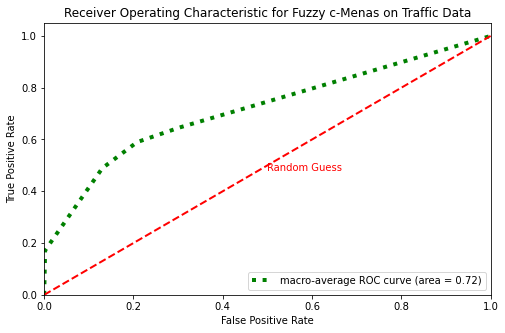

In [21]:
lw=2
plt.figure(figsize=(8,5))
plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='green', linestyle=':', linewidth=4)
plt.plot([0, 1], [0, 1], 'k--',color='red', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.annotate('Random Guess',(.5,.48),color='red')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Fuzzy c-Menas on Traffic Data')
plt.legend(loc="lower right")
plt.show()

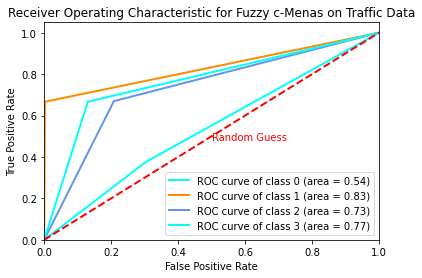

<Figure size 432x288 with 0 Axes>

In [22]:
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--',color='red', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.annotate('Random Guess',(.5,.48),color='red')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Fuzzy c-Menas on Traffic Data')
plt.legend(loc="lower right")
plt.show()
plt.savefig('foo.png')